In [3]:
# ## 1. Import bibliotek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ustawienia wizualizacji
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('viridis')
%matplotlib inline

In [5]:
# ## 2. Wczytanie danych

# Ścieżka do danych
data_path = '../data/raw/brazilian-ecommerce/'

# Lista plików
files = os.listdir(data_path)
print("Dostępne pliki:")
files

# Wczytywanie plików CSV
orders = pd.read_csv(f"{data_path}olist_orders_dataset.csv")
order_items = pd.read_csv(f"{data_path}olist_order_items_dataset.csv")
products = pd.read_csv(f"{data_path}olist_products_dataset.csv")
customers = pd.read_csv(f"{data_path}olist_customers_dataset.csv")
geolocation = pd.read_csv(f"{data_path}olist_geolocation_dataset.csv")
payments = pd.read_csv(f"{data_path}olist_order_payments_dataset.csv")
reviews = pd.read_csv(f"{data_path}olist_order_reviews_dataset.csv")
category_translation = pd.read_csv(f"{data_path}product_category_name_translation.csv")

Dostępne pliki:


In [7]:
# ## 3. Pierwsze spojrzenie na dane

# ### 3.1 Zamówienia

print("Pierwsze 5 wierszy zbioru zamówień:")
orders.head()

# ### 3.2 Elementy zamówień

print("Pierwsze 5 wierszy zbioru elementów zamówień:")
order_items.head()

# ### 3.3 Produkty

print("Pierwsze 5 wierszy zbioru produktów:")
products.head()

# ### 3.4 Klienci

print("Pierwsze 5 wierszy zbioru klientów:")
customers.head()

# ### 3.5 Płatności

print("Pierwsze 5 wierszy zbioru płatności:")
payments.head()

# ### 3.6 Recenzje

print("Pierwsze 5 wierszy zbioru recenzji:")
reviews.head()

# ### 3.7 Tłumaczenia kategorii

print("Pierwsze 5 wierszy zbioru tłumaczeń kategorii:")
category_translation.head()

Pierwsze 5 wierszy zbioru zamówień:
Pierwsze 5 wierszy zbioru elementów zamówień:
Pierwsze 5 wierszy zbioru produktów:
Pierwsze 5 wierszy zbioru klientów:
Pierwsze 5 wierszy zbioru płatności:
Pierwsze 5 wierszy zbioru recenzji:
Pierwsze 5 wierszy zbioru tłumaczeń kategorii:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# ## 4. Informacje o zbiorach danych

# ### 4.1 Zamówienia

print("\nInformacje o zbiorze zamówień:")
orders.info()

print("\nLiczba brakujących wartości w zbiorze zamówień:")
orders.isnull().sum()

# ### 4.2 Elementy zamówień

print("\nInformacje o zbiorze elementów zamówień:")
order_items.info()

print("\nLiczba brakujących wartości w zbiorze elementów zamówień:")
order_items.isnull().sum()

# ### 4.3 Produkty

print("\nInformacje o zbiorze produktów:")
products.info()

print("\nLiczba brakujących wartości w zbiorze produktów:")
products.isnull().sum()

# ### 4.4 Klienci

print("\nInformacje o zbiorze klientów:")
customers.info()

print("\nLiczba brakujących wartości w zbiorze klientów:")
customers.isnull().sum()

# ### 4.5 Płatności

print("\nInformacje o zbiorze płatności:")
payments.info()

print("\nLiczba brakujących wartości w zbiorze płatności:")
payments.isnull().sum()

# ### 4.6 Recenzje

print("\nInformacje o zbiorze recenzji:")
reviews.info()

print("\nLiczba brakujących wartości w zbiorze recenzji:")
reviews.isnull().sum()


Informacje o zbiorze zamówień:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Liczba brakujących wartości w zbiorze zamówień:

Informacje o zbiorze elementów zamówień:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
# ## 5. Statystyki opisowe

# ### 5.1 Zamówienia - statystyki dla dat

# Konwertujemy daty, aby obliczyć statystyki
orders_dates = orders.copy()
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    orders_dates[col] = pd.to_datetime(orders_dates[col])

# Okres danych
print("Okres danych w zbiorze zamówień:")
print(f"Najwcześniejsze zamówienie: {orders_dates['order_purchase_timestamp'].min()}")
print(f"Najpóźniejsze zamówienie: {orders_dates['order_purchase_timestamp'].max()}")
print(f"Okres danych: {(orders_dates['order_purchase_timestamp'].max() - orders_dates['order_purchase_timestamp'].min()).days} dni")

# ### 5.2 Statystyki opisowe dla elementów zamówień

print("\nStatystyki opisowe dla elementów zamówień (ceny, koszty wysyłki):")
order_items[['price', 'freight_value']].describe()

# ### 5.3 Statystyki opisowe dla płatności

print("\nStatystyki opisowe dla płatności:")
payments['payment_value'].describe()

# Liczba różnych metod płatności
print("\nMetody płatności:")
payments['payment_type'].value_counts()

# ### 5.4 Statystyki opisowe dla recenzji

print("\nRozkład ocen w recenzjach:")
reviews['review_score'].value_counts().sort_index()

Okres danych w zbiorze zamówień:
Najwcześniejsze zamówienie: 2016-09-04 21:15:19
Najpóźniejsze zamówienie: 2018-10-17 17:30:18
Okres danych: 772 dni

Statystyki opisowe dla elementów zamówień (ceny, koszty wysyłki):

Statystyki opisowe dla płatności:

Metody płatności:

Rozkład ocen w recenzjach:


review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

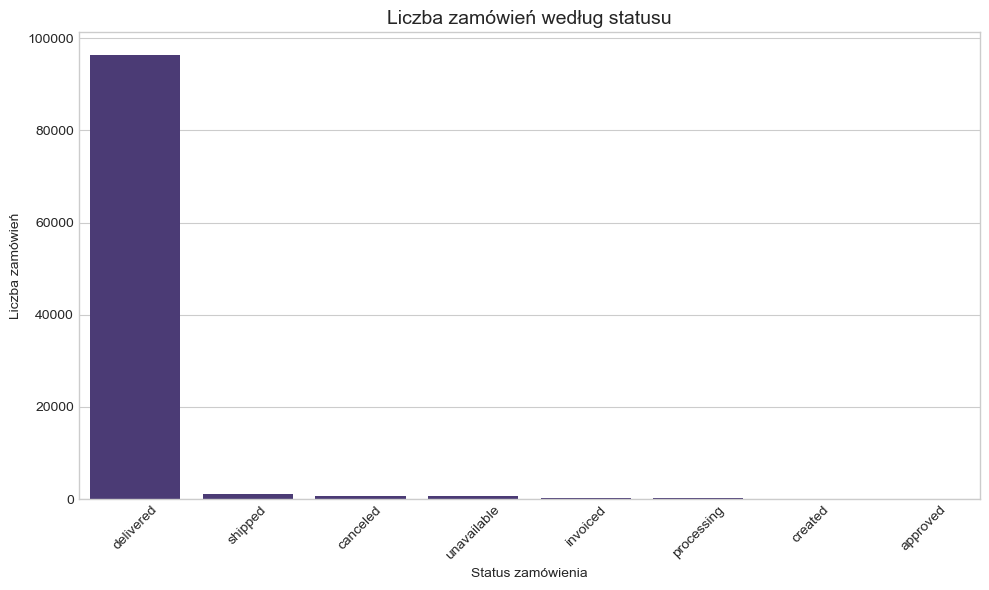

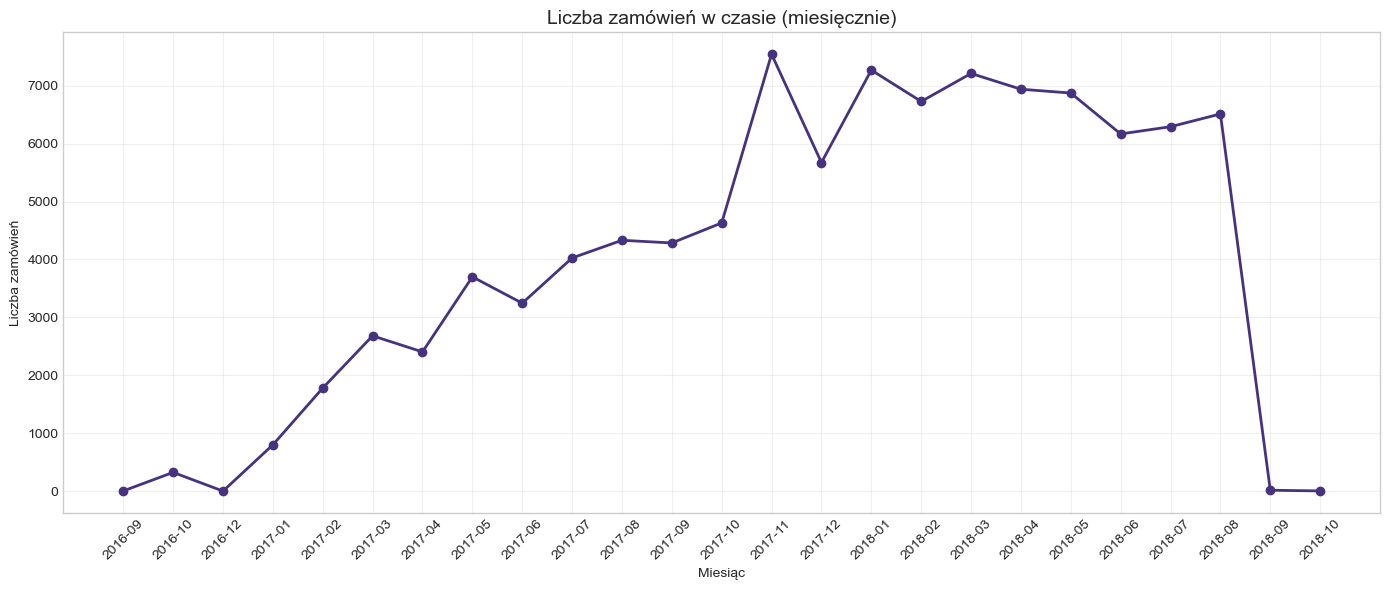

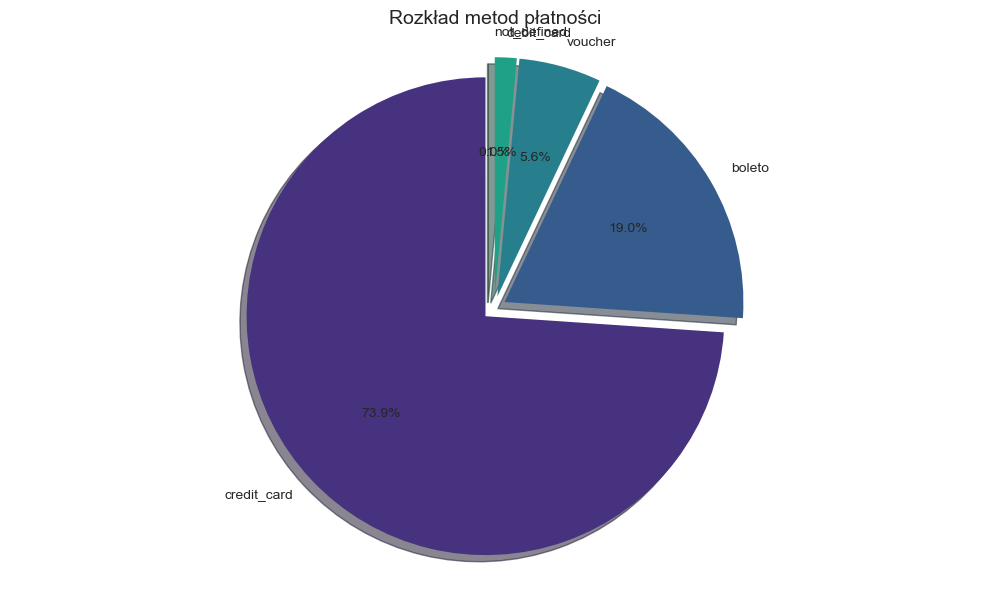

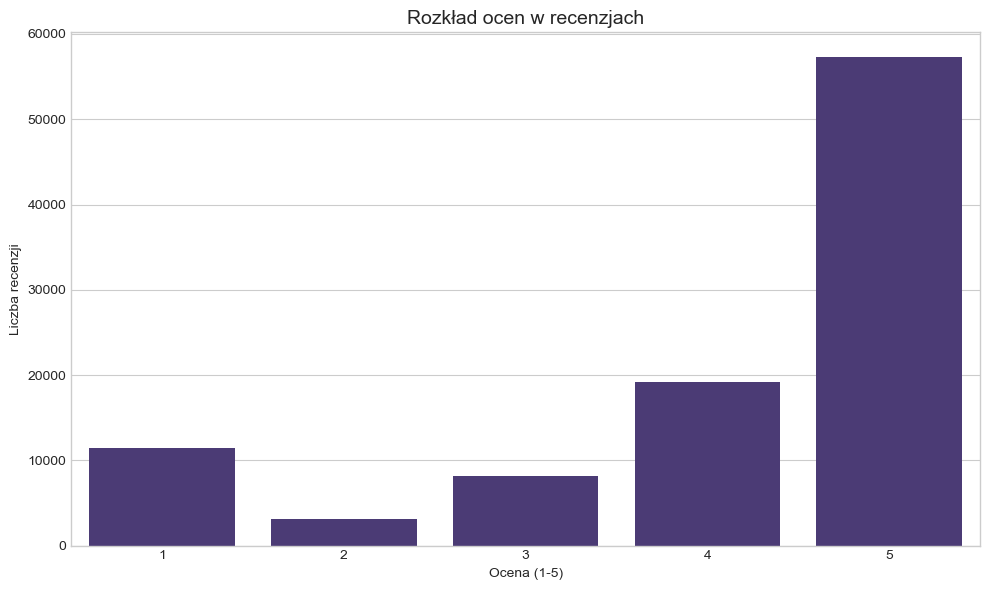

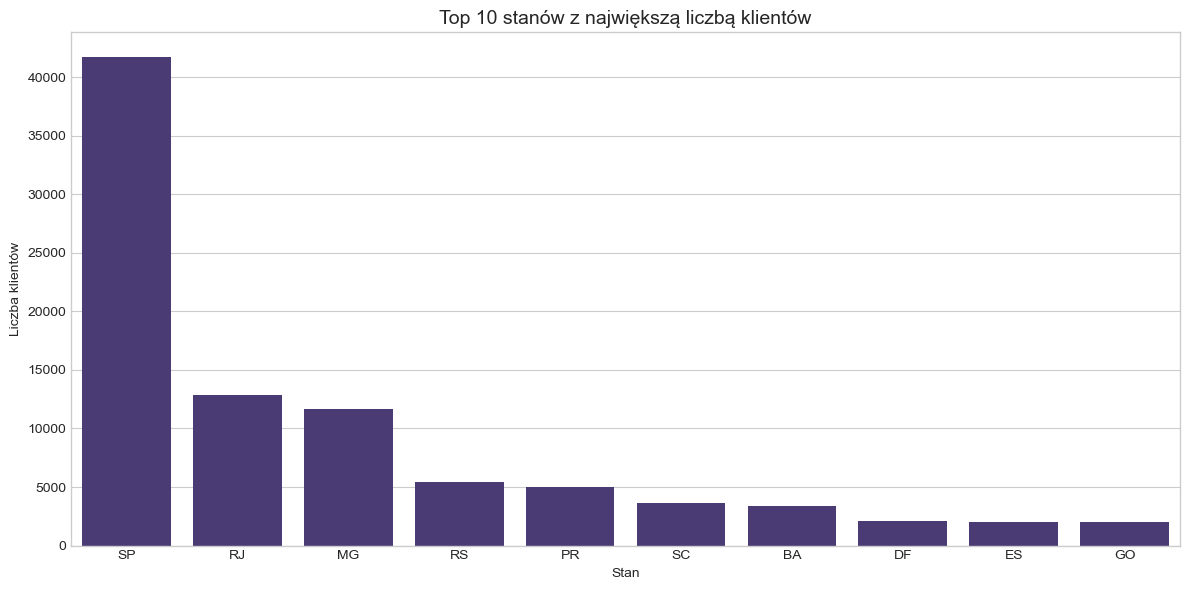

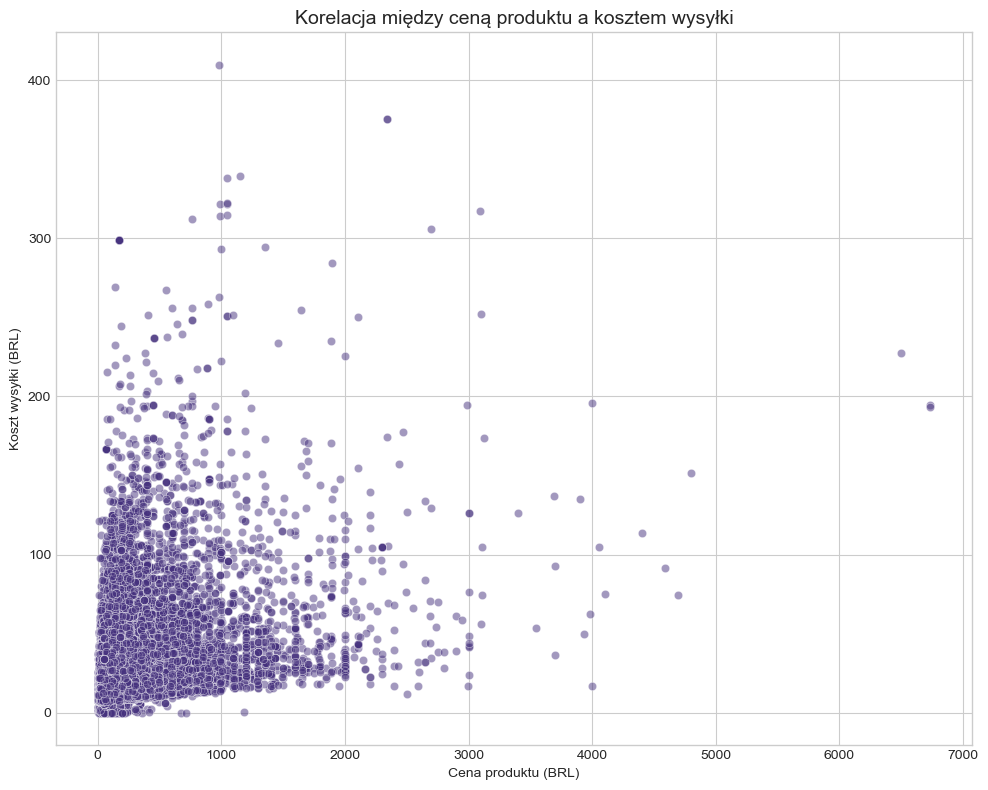

In [13]:
# ## 6. Podstawowe wizualizacje

# ### 6.1 Rozkład statusów zamówień

plt.figure(figsize=(10, 6))
order_status_counts = orders['order_status'].value_counts()
sns.barplot(x=order_status_counts.index, y=order_status_counts.values)
plt.title('Liczba zamówień według statusu', fontsize=14)
plt.xlabel('Status zamówienia')
plt.ylabel('Liczba zamówień')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ### 6.2 Liczba zamówień w czasie

# Konwertujemy daty na format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Dodajemy kolumnę z miesiącem zakupu
orders['purchase_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Liczymy zamówienia według miesięcy
monthly_orders = orders['purchase_month'].value_counts().sort_index()
monthly_orders.index = monthly_orders.index.astype(str)

plt.figure(figsize=(14, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', linestyle='-', linewidth=2)
plt.title('Liczba zamówień w czasie (miesięcznie)', fontsize=14)
plt.xlabel('Miesiąc')
plt.ylabel('Liczba zamówień')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ### 6.3 Rozkład metod płatności

plt.figure(figsize=(10, 6))
payment_type_counts = payments['payment_type'].value_counts()
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05] * len(payment_type_counts))
plt.title('Rozkład metod płatności', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# ### 6.4 Rozkład ocen z recenzji

plt.figure(figsize=(10, 6))
review_score_counts = reviews['review_score'].value_counts().sort_index()
sns.barplot(x=review_score_counts.index, y=review_score_counts.values)
plt.title('Rozkład ocen w recenzjach', fontsize=14)
plt.xlabel('Ocena (1-5)')
plt.ylabel('Liczba recenzji')
plt.tight_layout()
plt.show()

# ### 6.5 Top 10 stanów z największą liczbą klientów

plt.figure(figsize=(12, 6))
state_counts = customers['customer_state'].value_counts().head(10)
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 10 stanów z największą liczbą klientów', fontsize=14)
plt.xlabel('Stan')
plt.ylabel('Liczba klientów')
plt.tight_layout()
plt.show()

# ### 6.6 Korelacja między ceną a kosztem wysyłki

plt.figure(figsize=(10, 8))
sns.scatterplot(data=order_items, x='price', y='freight_value', alpha=0.5)
plt.title('Korelacja między ceną produktu a kosztem wysyłki', fontsize=14)
plt.xlabel('Cena produktu (BRL)')
plt.ylabel('Koszt wysyłki (BRL)')
plt.tight_layout()
plt.show()

In [15]:
# ## 7. Wnioski z eksploracji danych

# Na podstawie przeprowadzonej eksploracji danych możemy wyciągnąć następujące wnioski:
# 
# 1. **Okres danych**: Zbiór danych obejmuje zamówienia z okresu od [początek] do [koniec], co daje łącznie [liczba] dni.
# 
# 2. **Statusy zamówień**: Większość zamówień ma status "delivered", co oznacza, że zostały dostarczone do klientów.
# 
# 3. **Trend czasowy**: Liczba zamówień wykazuje [wzrost/spadek/stabilność] w analizowanym okresie, z widocznym sezonowym wzrostem w [miesiącach].
# 
# 4. **Metody płatności**: Najpopularniejszą metodą płatności jest [metoda], stanowiąca [procent]% wszystkich transakcji.
# 
# 5. **Oceny klientów**: Rozkład ocen w recenzjach jest [symetryczny/asymetryczny], z przewagą [wysokich/niskich] ocen.
# 
# 6. **Rozkład geograficzny**: Największa liczba klientów pochodzi ze stanów [stany], co może wskazywać na koncentrację sprzedaży w [regionach].
# 
# 7. **Cena i wysyłka**: Istnieje [silna/słaba] korelacja między ceną produktu a kosztem wysyłki.
# 
# W następnym notebooku zajmiemy się czyszczeniem danych i przygotowaniem ich do dalszej analizy.